# Sentiment Classification and Opinion Mining on Airline Reviews


PROJECT DESCRIPTION:-
                    Opinion Mining (OM) or Sentiment Analysis (SA) can be defined as the task of detecting, extracting and classifying opinions on something. It is a type of the processing of the natural language (NLP) to track the public mood to a certain law, policy, or marketing, etc. It involves a way that development for the collection and examination of comments and opinions about legislation, laws, policies, etc., which are posted on the social media. The process of information extraction is very important because it is a very useful technique but also a challenging task. That mean, to extract sentiment from an object in the web-wide, need to automate opinion-mining systems to do it. The existing techniques for sentiment analysis include machine learning (supervised and unsupervised), and lexical-based approaches. Hence, the main aim of this project presents a survey of sentiment analysis (SA) and opinion mining (OM) approaches, various techniques used that related in this field.

# 1.TEXT-PREPROCESSING

# 1.1 Import the libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# 1.2 IMPORT THE DATASET

In [4]:
dataset = pd.read_csv(r"E:\Mini Project\Sentiment Classification and Opinion Mining on Airline Reviews\DATASETS\Tweets.csv")

In [5]:
dataset

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [6]:
#CHECKING FOR NULL VALUES IN THE DATASET
dataset.isnull().any()

tweet_id                        False
airline_sentiment               False
airline_sentiment_confidence    False
negativereason                   True
negativereason_confidence        True
airline                         False
airline_sentiment_gold           True
name                            False
negativereason_gold              True
retweet_count                   False
text                            False
tweet_coord                      True
tweet_created                   False
tweet_location                   True
user_timezone                    True
dtype: bool

In [7]:
#CHECKING FOR NUMBER OF NULL VALUES IN THE DATASET
dataset.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [8]:
#GIVES THE CLEAR IDEA OF ALL THE DATASET 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [9]:
dataset.corr()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
tweet_id,1.000000,0.024840,0.021533,-0.008852
airline_sentiment_confidence,0.024840,1.000000,0.685879,0.012581
negativereason_confidence,0.021533,0.685879,1.000000,0.021574
retweet_count,-0.008852,0.012581,0.021574,1.000000


In [10]:
#dropping of columns
dataset =dataset.drop(columns=['tweet_id','airline_sentiment_gold','negativereason_gold','tweet_coord'], axis=1)
dataset.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## 1.3 SPLITTING THE DATA INTO X&Y

In [11]:
x= dataset.iloc[:,1:].values
x  

array([[1.0, nan, nan, ..., '2015-02-24 11:35:52 -0800', nan,
        'Eastern Time (US & Canada)'],
       [0.3486, nan, 0.0, ..., '2015-02-24 11:15:59 -0800', nan,
        'Pacific Time (US & Canada)'],
       [0.6837, nan, nan, ..., '2015-02-24 11:15:48 -0800', 'Lets Play',
        'Central Time (US & Canada)'],
       ...,
       [1.0, nan, nan, ..., '2015-02-22 11:59:15 -0800', 'Nigeria,lagos',
        nan],
       [1.0, 'Customer Service Issue', 0.6659, ...,
        '2015-02-22 11:59:02 -0800', 'New Jersey',
        'Eastern Time (US & Canada)'],
       [0.6771, nan, 0.0, ..., '2015-02-22 11:58:51 -0800', 'dallas, TX',
        nan]], dtype=object)

In [12]:
y=dataset.iloc[:,0].values
y

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [13]:
x.shape

(14640, 10)

In [14]:
y.shape

(14640,)

## DATA- VISUALISATION

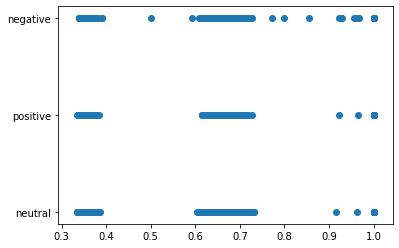

In [15]:
#Using ScatterPlots
plt.scatter(x[:,0],y)

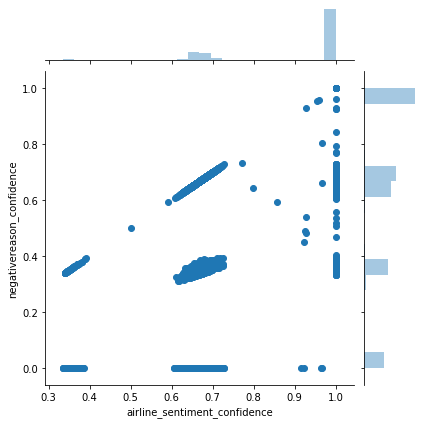

In [16]:
#ScatterPlots 

sns.jointplot(x="airline_sentiment_confidence", y="negativereason_confidence", data=dataset);

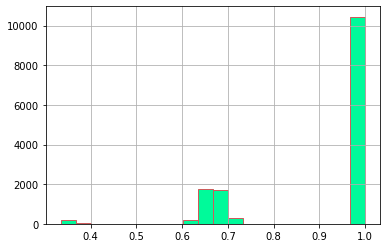

In [17]:
#Using Histograms

dataset['airline_sentiment_confidence'].hist(bins=20,color='mediumspringgreen',edgecolor='indianred')
plt.show()

In [18]:
dataset.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


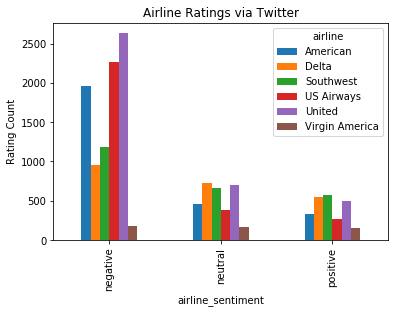

In [19]:
#Rating Based On Airline_sentiment

b = dataset.groupby(['airline','airline_sentiment']).count().iloc[:,0].unstack(0).plot(kind = 'bar', 
                                                                                  title = 'Airline Ratings via Twitter')
b.set_xlabel('airline_sentiment')
b.set_ylabel('Rating Count')
plt.show()

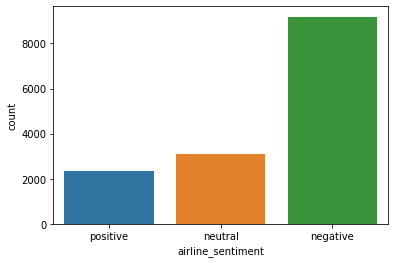

In [20]:
#Using CountPlot

sns.countplot(x='airline_sentiment',data=dataset,order=['positive','neutral','negative'])
plt.show()

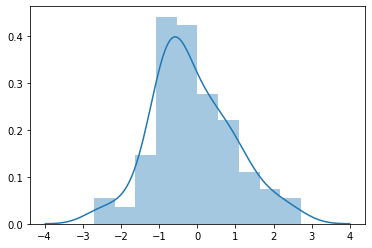

In [21]:
#Plotting Univariate Distributions

v = np.random.normal(size=100)
sns.distplot(v);

C:\Users\rajit\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\rajit\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


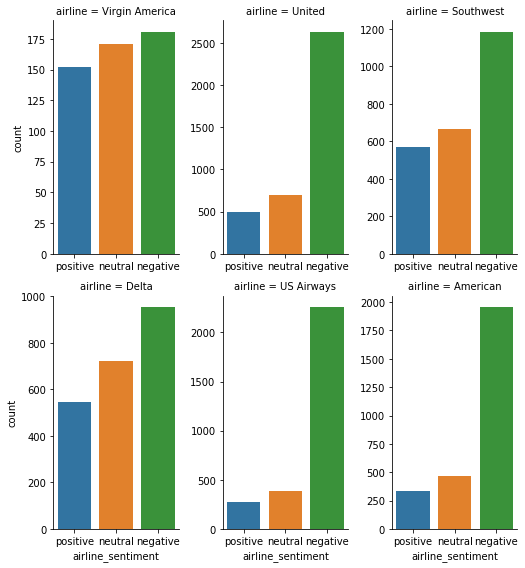

In [22]:
#Using FactorPlot

sns.factorplot(x = 'airline_sentiment',data=dataset, order = ['positive','neutral','negative'],
               kind = 'count',col_wrap=3,col='airline',
               size=4,aspect=0.6,sharex=False,sharey=False)
plt.show()

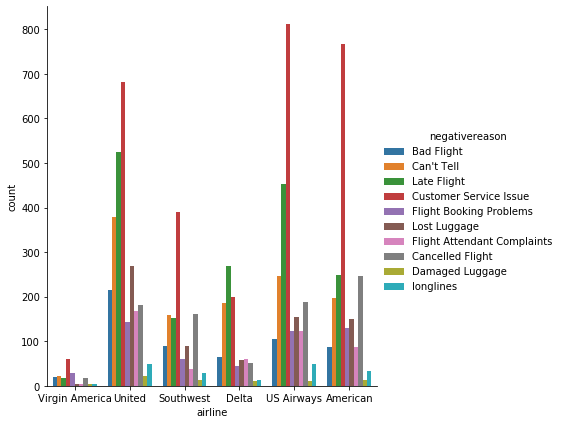

In [23]:
sns.factorplot(x = 'airline',data = dataset,kind = 'count',hue='negativereason',size=6,aspect=.9)
plt.show()

([<matplotlib.patches.Wedge at 0x121628ab688>,
 [Text(-0.46587324595946716, 1.1058761769290402, 'negative'),
  Text(-0.13194990000624415, -1.2128434457457165, 'neutral'),
  Text(1.206352618660121, -0.6701592045565506, 'positive')],
 [Text(-0.2717593934763558, 0.6450944365419401, '62.69%'),
  Text(-0.0778720721348326, -0.7157764597843571, '21.17%'),
  Text(0.7692683365368889, -0.4273478985578003, '16.14%')])

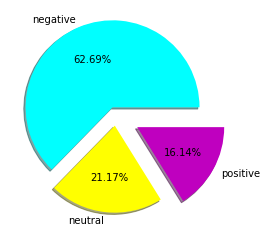

In [24]:
#Using PieChart

labels=['negative','neutral','positive']
size=[9178,3099,2363]
colors = ["cyan", "yellow", "m"]
explode = (0.1,0.12,0.28)
plt.pie(size,labels=labels,explode=explode,colors=colors,autopct='%1.2f%%',shadow=True)

## 1.5 TAKING CARE OF THE MISSING DATA

In [26]:
dataset = pd.read_csv(r"E:\Mini Project\Sentiment Classification and Opinion Mining on Airline Reviews\DATASETS\Tweets.csv")
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [27]:
#CONVERTING THE VALUES OF POSITIVE, NEGATIVE AND NEUTRAL VALUES TO [1,-1,0]
dict = {'negative':-1,
         'positive':1,
          'neutral':0}
dataset['airline_sentiment'].replace(dict,inplace=True)
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,0,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,0,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,-1,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,-1,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [28]:
#DROPING THE COLUMNS WHICH HAVE HUGE NO OF NULL VALUES

dataset.drop(['airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','tweet_id','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone'],axis=1,inplace=True)


In [29]:
dataset

,airline_sentiment,text
0,0,@VirginAmerica What @dhepburn said.
1,1,@VirginAmerica plus you've added commercials t...
2,0,@VirginAmerica I didn't today... Must mean I n...
3,-1,@VirginAmerica it's really aggressive to blast...
4,-1,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,1,@AmericanAir thank you we got on a different f...
14636,-1,@AmericanAir leaving over 20 minutes Late Flig...
14637,0,@AmericanAir Please bring American Airlines to...
14638,-1,"@AmericanAir you have my money, you change my ..."


In [30]:
#DROPING ROWS IN THE DATASET WHICH HAVE NULL VALUES
for i in range(0,14640):
    if(dataset['text'][i]==[]):
        dataset.drop(i,inplace=True)

In [31]:
dataset

,airline_sentiment,text
0,0,@VirginAmerica What @dhepburn said.
1,1,@VirginAmerica plus you've added commercials t...
2,0,@VirginAmerica I didn't today... Must mean I n...
3,-1,@VirginAmerica it's really aggressive to blast...
4,-1,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,1,@AmericanAir thank you we got on a different f...
14636,-1,@AmericanAir leaving over 20 minutes Late Flig...
14637,0,@AmericanAir Please bring American Airlines to...
14638,-1,"@AmericanAir you have my money, you change my ..."


## 1.6 STEMMING

In [32]:
import nltk

In [33]:
#DOWNLOADING STOPWORDS
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
#IMPORTING STOPWORDS AND PORT STEMMER
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [35]:
ps=PorterStemmer()
data=[] 
for i in range(0,14640):
    review=dataset['text'][i]
    review=re.sub('[^a-zA-Z]',' ',review)
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review) 
    data.append(review) 

In [36]:
data

['virginamerica dhepburn said',
 'virginamerica plu ad commerci experi tacki',
 'virginamerica today must mean need take anoth trip',
 'virginamerica realli aggress blast obnoxi entertain guest face amp littl recours',
 'virginamerica realli big bad thing',
 'virginamerica serious would pay flight seat play realli bad thing fli va',
 'virginamerica ye nearli everi time fli vx ear worm go away',
 'virginamerica realli miss prime opportun men without hat parodi http co mwpg grezp',
 'virginamerica well',
 'virginamerica amaz arriv hour earli good',
 'virginamerica know suicid second lead caus death among teen',
 'virginamerica lt pretti graphic much better minim iconographi',
 'virginamerica great deal alreadi think nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia fli fabul seduct sky u take stress away travel http co ahlxhhkiyn',
 'virginamerica thank',
 'virginamerica sfo pdx schedul still mia',
 'virginamerica excit first cross countri flight lax mco heard n

## 1.7 COUNTVECTORIZER

In [37]:
from sklearn.feature_extraction.text import CountVectorizer #for tokeniser i.e,binary
cv = CountVectorizer(max_features = 800)
x = cv.fit_transform(data).toarray()
y = dataset.iloc[:,0].values

In [38]:
#MAKING ALL THE TRANSFORMATION INTO THE TWEET.PKL FILE
import pickle
pickle.dump(cv,open('tweet.pkl','wb'))

In [39]:
#PERFORMING LABEL ENCODING ON THE Y 
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

## 1.8 SPLITTING THE DATA INTO TRAIN AND TEST

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

## 2. MODEL-BUILDING

## 2.1 INTIALIZING THE ANN MODEL

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
x_train.shape

In [ ]:
model = Sequential()

##  2. 2 ADDING INPUT LAYER

In [ ]:
model.add(Dense(units = 800, init = "random_uniform", activation = "sigmoid"))

## 2.3 ADDING HIDDEN LAYER

In [ ]:
model.add(Dense(units = 100, init = "random_uniform", activation = "sigmoid"))

## 2.4 ADDING OUTPUT LAYER

In [ ]:
model.add(Dense(units = 3, init = "random_uniform", activation = "softmax"))

## 2.5 CONFIGUE THE LEARNING PROCESS

In [ ]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

## 2.6 TRAIN AND TEST THE MODEL

In [ ]:
model.fit(x_train,y_train, epochs = 50, batch_size = 100)

In [ ]:
y_pred = model.predict(x_test)
y_pred

In [ ]:
y_pred = y_pred>0.5
y_pred

In [ ]:
y_test

In [ ]:
score = model.evaluate(x_test, y_test)

print("Test Score:", score[1])
print("Test Accuracy:", score[1])

In [ ]:
v=model.predict(cv.transform([""]))
v

In [ ]:
r=model.predict(cv.transform(["good service"]))
r

In [ ]:
r=model.predict(cv.transform(["Can't Tell"]))
r

## 2.7 SAVE THE MODEL

In [ ]:
model.save("airline_predictions.h5")

## SAVE THE PICKLE FILE

In [ ]:
import pickle
pickle.dump(model, open('prediction.pkl','wb'))
# this is the pickle file sir